-1.0028066488529068 1.2307715306579121 1.0272394533589706 -0.2607786354986585 0.005574300334682499
sum of w_i =  0.9999999999999999


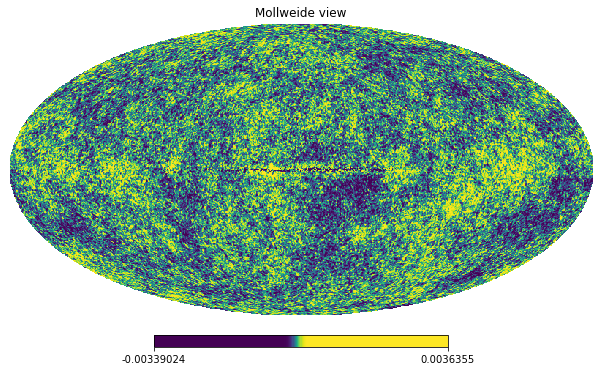

In [3]:
import healpy as hp
import numpy as np
import math

list_file = [hp.fitsfunc.read_map('GHz100_smoothed_512'), hp.fitsfunc.read_map('GHz143_smoothed_512'), hp.fitsfunc.read_map('GHz217_smoothed_512'), hp.fitsfunc.read_map('GHz353_smoothed_512'), hp.fitsfunc.read_map('GHz545_smoothed_512_KCMB')]

M = np.array([list_file[i].T for i in range(5)]) # Matrix of the vectors

covariance_matrix = np.cov(M)
inverse = np.linalg.inv(covariance_matrix)

I = np.ones(5).T

numerator = inverse.dot(I) # C^-1 x I
denominator = I.T.dot(inverse.dot(I)) # I.T x C^-1 x I
w = numerator/denominator
print(w[0], w[1], w[2], w[3], w[4])
print('sum of w_i = ', w[0]+w[1]+w[2]+w[3]+w[4]) # Sum of w_i must be 1

T_CMB = 0
for i in range(5):
    T_CMB += w[i]*list_file[i]
hp.mollview(T_CMB, norm='hist')

#hp.fitsfunc.write_map('CMB_map', T_CMB)